In [963]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [964]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000,n_features=10, n_classes=2, random_state=15)

In [965]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=17)

In [966]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print(y_pred)

[1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0
 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1
 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0
 0 1 1 1]


In [967]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8966666666666666
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       154
           1       0.86      0.95      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[131  23]
 [  8 138]]


## Cross Validation
### Grid SearchCV

In [968]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [969]:
params = dict(penalty=penalty, C=c , solver=solver)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [970]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)

In [971]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [972]:
grid.fit(X_train, y_train)

c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Vivek\AppD

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [973]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [974]:
grid.best_score_

np.float64(0.9371428571428572)

In [975]:
y_pred = grid.predict(X_test)

In [976]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8933333333333333
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       155
           1       0.85      0.94      0.90       145

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300

[[131  24]
 [  8 137]]


### Randomized SearchCV

In [977]:
from sklearn.model_selection import RandomizedSearchCV

randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [978]:
randomcv.fit(X_train,y_train)

c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Vivek\AppData

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [979]:
randomcv.best_score_

np.float64(0.9314285714285715)

In [980]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}

In [981]:
y_pred = randomcv.predict(X_test)

In [982]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       161
           1       0.84      0.97      0.90       139

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

[[135  26]
 [  4 135]]


## Logistic Regression for Multiclass Classification

In [985]:
X, y = make_classification(n_samples=1000,n_features=10, n_informative=3, n_classes=3, random_state=15)

In [986]:
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [987]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=17)

In [990]:
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7933333333333333
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        95
           1       0.79      0.77      0.78       107
           2       0.75      0.79      0.77        98

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[79  7  9]
 [ 9 82 16]
 [ 6 15 77]]


## Logistic Regression for Imbalanced Data

In [1021]:
X, y = make_classification(n_samples=10000,n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=17)

In [1022]:
X = pd.DataFrame(X)
X

,0,1
0,-1.331544,-2.315611
1,-1.268125,-2.579250
2,-0.406268,0.349111
3,-0.852085,0.056304
4,-0.685277,-0.888042
...,...,...
9995,-0.949763,-0.892441
9996,-0.850712,-0.993578
9997,-1.606955,-1.071892
9998,-1.109352,-1.106335


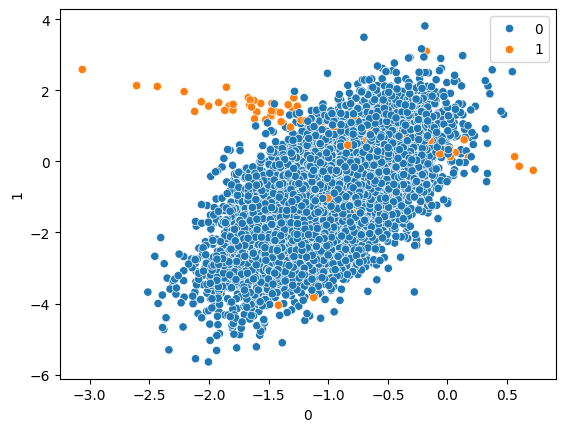

In [1023]:
sns.scatterplot(x=X[0],y=X[1],hue=y)
plt.show()

In [1024]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=17)

In [1027]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [1029]:
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)
grid.fit(X_train,y_train)

c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [1032]:
grid.best_params_

{'C': 0.1, 'class_weight': {0: 100, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}

In [1033]:
grid.best_score_

np.float64(0.9853333333333334)

In [1034]:
y_pred = grid.predict(X_test)

print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9848
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2500
           1       0.00      0.00      0.00         0

    accuracy                           0.98      2500
   macro avg       0.50      0.49      0.50      2500
weighted avg       1.00      0.98      0.99      2500

[[2462   38]
 [   0    0]]


c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita